# Site: https://ranked.vote/us/vt/btv/2009/03/mayor/
# 2019 RCV Python library: https://pypi.org/project/pyrankvote/
# repo here: https://github.com/jontingvold/pyrankvote

In [1]:
import pandas as pd
import numpy as np
import pyrankvote
from pyrankvote import Candidate, Ballot
from IPython.display import Image


### 1. Load data

#### a. Ballots

In [2]:
data = "./data/us_nm_2018_03_mayor.normalized.csv"
df = pd.read_csv(data)
df.head()

,ballot_id,rank,choice
0,671489,1,Joseph M. Maestas
1,671489,2,Kate I. Noble
2,671489,3,Alan Webber
3,671489,4,Peter N. Ives
4,671489,5,Ronald S. Trujillo


In [3]:
df.shape

(124020, 3)

In [4]:
df.choice.unique()

array(['Joseph M. Maestas', 'Kate I. Noble', 'Alan Webber',
       'Peter N. Ives', 'Ronald S. Trujillo', '$UNDERVOTE', '$OVERVOTE'],
      dtype=object)

#### b. Candidates

In [5]:
maestas = Candidate('Joseph M. Maestas')
noble = Candidate('Kate I. Noble')
webber = Candidate('Alan Webber')
ives = Candidate('Peter N. Ives')
trujillo = Candidate('Ronald S. Trujillo')

candidates = [maestas, noble, webber, ives, trujillo]

## Getting rid of duplicates

In [6]:
len(df.drop_duplicates())

123787

In [7]:
len(df)

124020

In [8]:
df['ballot_id_rank'] = df['ballot_id'].astype(str) + '_' + df['rank'].astype(str)

In [9]:
df.head()

,ballot_id,rank,choice,ballot_id_rank
0,671489,1,Joseph M. Maestas,671489_1
1,671489,2,Kate I. Noble,671489_2
2,671489,3,Alan Webber,671489_3
3,671489,4,Peter N. Ives,671489_4
4,671489,5,Ronald S. Trujillo,671489_5


In [10]:
df[df.duplicated(subset='ballot_id_rank') == True]

,ballot_id,rank,choice,ballot_id_rank
66024,259102,1,Alan Webber,259102_1
66025,259102,2,Joseph M. Maestas,259102_2
66026,259102,3,Peter N. Ives,259102_3
66027,259102,4,Kate I. Noble,259102_4
66028,259102,5,Ronald S. Trujillo,259102_5
...,...,...,...,...
100339,810723,2,Alan Webber,810723_2
100340,810723,3,Peter N. Ives,810723_3
100341,810723,4,Ronald S. Trujillo,810723_4
100342,810723,5,Joseph M. Maestas,810723_5


In [11]:
df[df['ballot_id'] == 810723]  # definite duplicates

,ballot_id,rank,choice,ballot_id_rank
57462,810723,1,Alan Webber,810723_1
57463,810723,2,Peter N. Ives,810723_2
57464,810723,3,Kate I. Noble,810723_3
57465,810723,4,$UNDERVOTE,810723_4
57466,810723,5,$UNDERVOTE,810723_5
57467,810723,6,$UNDERVOTE,810723_6
100338,810723,1,Kate I. Noble,810723_1
100339,810723,2,Alan Webber,810723_2
100340,810723,3,Peter N. Ives,810723_3
100341,810723,4,Ronald S. Trujillo,810723_4


In [12]:
len(df.drop_duplicates(subset='ballot_id_rank'))

123306

In [13]:
df = df.drop_duplicates(subset='ballot_id_rank')

### 2. Preprocess data

#### Pivot data

In [14]:
df1 = df.pivot(index='ballot_id', columns='rank', values='choice').rename_axis(None, axis=1).reset_index()
df1.head()

,ballot_id,1,2,3,4,5,6
0,81,Ronald S. Trujillo,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE
1,128,Kate I. Noble,Joseph M. Maestas,Alan Webber,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE
2,165,Alan Webber,Kate I. Noble,Peter N. Ives,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE
3,304,Kate I. Noble,Peter N. Ives,Alan Webber,Ronald S. Trujillo,Joseph M. Maestas,$UNDERVOTE
4,348,Kate I. Noble,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE


#### Remove NaN

In [15]:
df1 = df1.replace(np.nan, '0')
df1.head()

,ballot_id,1,2,3,4,5,6
0,81,Ronald S. Trujillo,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE
1,128,Kate I. Noble,Joseph M. Maestas,Alan Webber,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE
2,165,Alan Webber,Kate I. Noble,Peter N. Ives,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE
3,304,Kate I. Noble,Peter N. Ives,Alan Webber,Ronald S. Trujillo,Joseph M. Maestas,$UNDERVOTE
4,348,Kate I. Noble,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE


In [16]:
list_of_ballot_choices = df1[[1, 2, 3, 4, 5]].values.tolist()

In [17]:
for x in list_of_ballot_choices:
    while '0' in x:
        x.remove('0')

In [18]:
df1['ballot_choices_list'] = list_of_ballot_choices
df1.head()

,ballot_id,1,2,3,4,5,6,ballot_choices_list
0,81,Ronald S. Trujillo,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,"[Ronald S. Trujillo, $UNDERVOTE, $UNDERVOTE, $..."
1,128,Kate I. Noble,Joseph M. Maestas,Alan Webber,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE,"[Kate I. Noble, Joseph M. Maestas, Alan Webber..."
2,165,Alan Webber,Kate I. Noble,Peter N. Ives,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,"[Alan Webber, Kate I. Noble, Peter N. Ives, $U..."
3,304,Kate I. Noble,Peter N. Ives,Alan Webber,Ronald S. Trujillo,Joseph M. Maestas,$UNDERVOTE,"[Kate I. Noble, Peter N. Ives, Alan Webber, Ro..."
4,348,Kate I. Noble,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,$UNDERVOTE,"[Kate I. Noble, $UNDERVOTE, $UNDERVOTE, $UNDER..."


#### Remove invalid data

Special exceptions, from https://github.com/ranked-vote/rcv-data-format/blob/master/README.md#normalized-vs-raw:

- UNDERVOTE: the ballot did not list a candidate for this rank.
- OVERVOTE: the ballot voted for multiple candidates in the rank, invalidating the vote for that rank (and possibly others, depending on the jurisdiction’s rules.)
- WRITE_IN: the ballot listed a write-in candidate, and the raw voting data does not indicate that candidate’s name.

In [19]:
def remove_anomalies_from_ballots(ballots, value_to_remove):
    """
    ballots: series from dataframe. Each row contains a list of ranked candidates representing 1 ballot.
    value_to_remove: string that a ballot contains as a condition for its deletion
    """
    indices_to_drop = []
    
    for index, value in enumerate(ballots):
        if value_to_remove in value:
            indices_to_drop.append(index)
                   
    return indices_to_drop


In [20]:
# Removing write-ins, undervotes, and overvotes

write_in_indices_to_drop = remove_anomalies_from_ballots(df1['ballot_choices_list'], 'Write-in')
undervote_indices_to_drop = remove_anomalies_from_ballots(df1['ballot_choices_list'], '$UNDERVOTE')
overvote_indices_to_drop = remove_anomalies_from_ballots(df1['ballot_choices_list'], '$OVERVOTE')

indices_to_drop = write_in_indices_to_drop +  undervote_indices_to_drop + overvote_indices_to_drop

In [21]:
df1 = df1.drop(index=indices_to_drop)
df1.shape

(12786, 8)

In [ ]:
# Interesting note. Dataset originally had ~124k rows of data. After dropping invalid ballots + write-ins,
# undervotes, and overvotes, it gets reduced to ~13k. Very big loss of data.

In [22]:
candidates_array = []

for candidate_list in df1['ballot_choices_list']:
    ballot = []
    for candidate in candidate_list:
        candidate = candidate.strip(' ')
        ballot.append(Candidate(candidate))
    candidates_array.append(ballot)
candidates_array

[[<Candidate('Kate I. Noble')>,
  <Candidate('Joseph M. Maestas')>,
  <Candidate('Alan Webber')>,
  <Candidate('Peter N. Ives')>,
  <Candidate('Ronald S. Trujillo')>],
 [<Candidate('Kate I. Noble')>,
  <Candidate('Peter N. Ives')>,
  <Candidate('Alan Webber')>,
  <Candidate('Ronald S. Trujillo')>,
  <Candidate('Joseph M. Maestas')>],
 [<Candidate('Alan Webber')>,
  <Candidate('Kate I. Noble')>,
  <Candidate('Peter N. Ives')>,
  <Candidate('Joseph M. Maestas')>,
  <Candidate('Ronald S. Trujillo')>],
 [<Candidate('Alan Webber')>,
  <Candidate('Peter N. Ives')>,
  <Candidate('Joseph M. Maestas')>,
  <Candidate('Kate I. Noble')>,
  <Candidate('Ronald S. Trujillo')>],
 [<Candidate('Alan Webber')>,
  <Candidate('Joseph M. Maestas')>,
  <Candidate('Kate I. Noble')>,
  <Candidate('Peter N. Ives')>,
  <Candidate('Ronald S. Trujillo')>],
 [<Candidate('Ronald S. Trujillo')>,
  <Candidate('Peter N. Ives')>,
  <Candidate('Joseph M. Maestas')>,
  <Candidate('Alan Webber')>,
  <Candidate('Kate I. Nob

In [23]:
df1['ballot_choices_list_with_candidate_objects'] = candidates_array
df1.head()

,ballot_id,1,2,3,4,5,6,ballot_choices_list,ballot_choices_list_with_candidate_objects
1,128,Kate I. Noble,Joseph M. Maestas,Alan Webber,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE,"[Kate I. Noble, Joseph M. Maestas, Alan Webber...","[Kate I. Noble, Joseph M. Maestas, Alan Webber..."
3,304,Kate I. Noble,Peter N. Ives,Alan Webber,Ronald S. Trujillo,Joseph M. Maestas,$UNDERVOTE,"[Kate I. Noble, Peter N. Ives, Alan Webber, Ro...","[Kate I. Noble, Peter N. Ives, Alan Webber, Ro..."
6,407,Alan Webber,Kate I. Noble,Peter N. Ives,Joseph M. Maestas,Ronald S. Trujillo,$UNDERVOTE,"[Alan Webber, Kate I. Noble, Peter N. Ives, Jo...","[Alan Webber, Kate I. Noble, Peter N. Ives, Jo..."
7,429,Alan Webber,Peter N. Ives,Joseph M. Maestas,Kate I. Noble,Ronald S. Trujillo,$UNDERVOTE,"[Alan Webber, Peter N. Ives, Joseph M. Maestas...","[Alan Webber, Peter N. Ives, Joseph M. Maestas..."
8,440,Alan Webber,Joseph M. Maestas,Kate I. Noble,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE,"[Alan Webber, Joseph M. Maestas, Kate I. Noble...","[Alan Webber, Joseph M. Maestas, Kate I. Noble..."


## **Uncomment and use this section to remove a candidate from all ballots in df2

In [ ]:
#import copy
#candidates_array_copy = copy.deepcopy(candidates_array) 
#candidates_array_copy

In [ ]:
#df2 = df1.copy(deep=True)
#df2['ballot_choices_list_with_candidate_objects'] = candidates_array_copy

In [ ]:
#df1['ballot_choices_list_with_candidate_objects']

In [ ]:
#def rm_cand_from_ballot(cand_rm, df2):
#    for index,value in enumerate(df2['ballot_choices_list_with_candidate_objects']):
#        val = value
#        print(index, value)
#        if cand_rm in val:
#            val.remove(cand_rm)
#            print(index, value)
#

In [ ]:
#rm_cand_from_ballot(Candidate('Bob Kiss'),df2)

In [ ]:
#df2['ballot_choices_list_with_candidate_objects']

In [ ]:
#Only 'ballot_choices_list_with_candidate_objects' column is modified to remove candidates. So use that in further calculations
#df1=df2 

### 3. Create ballot objects

In [24]:
ballot_objects = []

for index,value in enumerate(df1['ballot_choices_list_with_candidate_objects']):
    ballot = Ballot(ranked_candidates=value)
    ballot_objects.append(ballot)
    
ballot_objects

[<Ballot(Kate I. Noble, Joseph M. Maestas, Alan Webber, Peter N. Ives, Ronald S. Trujillo)>,
 <Ballot(Kate I. Noble, Peter N. Ives, Alan Webber, Ronald S. Trujillo, Joseph M. Maestas)>,
 <Ballot(Alan Webber, Kate I. Noble, Peter N. Ives, Joseph M. Maestas, Ronald S. Trujillo)>,
 <Ballot(Alan Webber, Peter N. Ives, Joseph M. Maestas, Kate I. Noble, Ronald S. Trujillo)>,
 <Ballot(Alan Webber, Joseph M. Maestas, Kate I. Noble, Peter N. Ives, Ronald S. Trujillo)>,
 <Ballot(Ronald S. Trujillo, Peter N. Ives, Joseph M. Maestas, Alan Webber, Kate I. Noble)>,
 <Ballot(Alan Webber, Ronald S. Trujillo, Peter N. Ives, Kate I. Noble, Joseph M. Maestas)>,
 <Ballot(Joseph M. Maestas, Ronald S. Trujillo, Kate I. Noble, Peter N. Ives, Alan Webber)>,
 <Ballot(Kate I. Noble, Alan Webber, Joseph M. Maestas, Peter N. Ives, Ronald S. Trujillo)>,
 <Ballot(Ronald S. Trujillo, Peter N. Ives, Joseph M. Maestas, Kate I. Noble, Alan Webber)>,
 <Ballot(Ronald S. Trujillo, Joseph M. Maestas, Peter N. Ives, Alan We

In [25]:
df1['ballot_objects'] = ballot_objects
df1.head()

,ballot_id,1,2,3,4,5,6,ballot_choices_list,ballot_choices_list_with_candidate_objects,ballot_objects
1,128,Kate I. Noble,Joseph M. Maestas,Alan Webber,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE,"[Kate I. Noble, Joseph M. Maestas, Alan Webber...","[Kate I. Noble, Joseph M. Maestas, Alan Webber...","<Ballot(Kate I. Noble, Joseph M. Maestas, Alan..."
3,304,Kate I. Noble,Peter N. Ives,Alan Webber,Ronald S. Trujillo,Joseph M. Maestas,$UNDERVOTE,"[Kate I. Noble, Peter N. Ives, Alan Webber, Ro...","[Kate I. Noble, Peter N. Ives, Alan Webber, Ro...","<Ballot(Kate I. Noble, Peter N. Ives, Alan Web..."
6,407,Alan Webber,Kate I. Noble,Peter N. Ives,Joseph M. Maestas,Ronald S. Trujillo,$UNDERVOTE,"[Alan Webber, Kate I. Noble, Peter N. Ives, Jo...","[Alan Webber, Kate I. Noble, Peter N. Ives, Jo...","<Ballot(Alan Webber, Kate I. Noble, Peter N. I..."
7,429,Alan Webber,Peter N. Ives,Joseph M. Maestas,Kate I. Noble,Ronald S. Trujillo,$UNDERVOTE,"[Alan Webber, Peter N. Ives, Joseph M. Maestas...","[Alan Webber, Peter N. Ives, Joseph M. Maestas...","<Ballot(Alan Webber, Peter N. Ives, Joseph M. ..."
8,440,Alan Webber,Joseph M. Maestas,Kate I. Noble,Peter N. Ives,Ronald S. Trujillo,$UNDERVOTE,"[Alan Webber, Joseph M. Maestas, Kate I. Noble...","[Alan Webber, Joseph M. Maestas, Kate I. Noble...","<Ballot(Alan Webber, Joseph M. Maestas, Kate I..."


# Audrey testing generate_condorcet_winner.py functions:

In [144]:
# Sherin functions: 

def create_ballot_dict(ballots):
    """
    """
    all_ballots = ballots
    ballot_dict = {}
    for i in range(len(all_ballots)):
        ballot_str = str(all_ballots[i])
        curr_ballot = all_ballots[i]
        if ballot_str in ballot_dict:
            ballot_dict[ballot_str][0] = ballot_dict[ballot_str][0] + 1
        else:
            ballot_dict[ballot_str] = [1, all_ballots[i]]
    return ballot_dict


def create_candidate_matrix(candidates):
    candidate_names = []
    for cand in candidates:
        candidate_names.append(cand.name)

    cand_matrix = pd.DataFrame(0, columns=candidate_names, index=candidate_names)
    return cand_matrix


def symbolize_cand_matrix(cand_matrix):
    for i in cand_matrix.index:
        for j in cand_matrix.columns:
            if i == j:
                cand_matrix.loc[i, j] = '`'
            else:
                if cand_matrix.loc[i, j] != '++' and cand_matrix.loc[i, j] != '--':
                    if cand_matrix.loc[i, j] > cand_matrix.loc[j, i]:
                        cand_matrix.loc[i, j] = '++'
                        cand_matrix.loc[j, i] = '--'
                    else:
                        cand_matrix.loc[i, j] = '--'
                        cand_matrix.loc[j, i] = '++'
    return cand_matrix

def countX(lst, x):
    return lst.count(x)

def return_winners(cand_matrix):
    results = []
    result_dict={}
    for i in cand_matrix.index:
        key = ''.join([str(countX(list(cand_matrix.loc[i]),'--')+1), ". ",i])
        result_dict[key]= [countX(list(cand_matrix.loc[i]),'--')+1, (countX(list(cand_matrix.loc[i]),'++'), countX(list(cand_matrix.loc[i]),'--'))]
    for key, item in sorted(result_dict.items(), key=lambda x: x[1]):
        results.append("Rank %s: [Rank, (Wins, losses] %s" % (key, item))

    return results

def condorcet_compile(candidates, ballots):
    ballot_dict = create_ballot_dict(ballots)

    candidate_names = []
    for cand in candidates:
        candidate_names.append(cand.name)

    cand_matrix = pd.DataFrame(0, columns=candidate_names, index=candidate_names)

    for votes, ballot in ballot_dict.values():
        ranked_candidates = [cand.name for cand in list(ballot.ranked_candidates)]
        process_cands = list(cand_matrix.columns)
        for i, current_cand in enumerate(ranked_candidates):
            process_cands.remove(current_cand)
            cand_matrix.loc[current_cand][process_cands] = cand_matrix.loc[current_cand][process_cands] + votes

    symbolize_cand_matrix(cand_matrix)
    return return_winners(cand_matrix)

    
def  parse_condorcet_results(condorcet_results):  # list
    parsed_results = []

    for i in condorcet_results:
        cand = i.split(':')[0].split('. ')[1]
        wins = int(i.split(':')[1].split(', ')[-2:][0].split('(')[1])
        parsed_results.append((cand, wins))
        
    return parsed_results


def return_condorcet_winner(parsed_results):
    return sorted(parsed_results, key=lambda x: x[1], reverse=True)[0]
    

In [147]:
df = df1
cand_list = candidates
ballots = ballot_objects
results = condorcet_compile(cand_list, ballots)
parsed_results = parse_condorcet_results(results)
main(parsed_results)

('Alan Webber', 4)

___

### 4. Run Instant Runoff

In [56]:
election_result = pyrankvote.instant_runoff_voting(candidates, df1['ballot_objects'])
election_result

ElectionResults(5 rounds)

In [57]:
print(election_result)

ROUND 1
Candidate             Votes  Status
------------------  -------  --------
Alan Webber            4979  Hopeful
Kate I. Noble          3102  Hopeful
Ronald S. Trujillo     2792  Hopeful
Joseph M. Maestas      1079  Hopeful
Peter N. Ives           834  Hopeful

ROUND 2
Candidate             Votes  Status
------------------  -------  --------
Alan Webber            5274  Hopeful
Kate I. Noble          3346  Hopeful
Ronald S. Trujillo     2953  Hopeful
Joseph M. Maestas      1213  Hopeful
Peter N. Ives             0  Rejected

ROUND 3
Candidate             Votes  Status
------------------  -------  --------
Alan Webber            5705  Hopeful
Kate I. Noble          3816  Hopeful
Ronald S. Trujillo     3265  Hopeful
Joseph M. Maestas         0  Rejected
Peter N. Ives             0  Rejected

ROUND 4
Candidate             Votes  Status
------------------  -------  --------
Alan Webber            7168  Hopeful
Kate I. Noble          5618  Hopeful
Ronald S. Trujillo        0  Rejected

### a. IRV winner

In [58]:
winners = election_result.get_winners()
winners

[<Candidate('Alan Webber')>]

### b. Condorcet winner

#### i. Functions

In [59]:
def create_ballot_dict(df1):
    all_ballots = list(df1['ballot_objects'].values)
    ballot_dict={}
    for i in range(len(all_ballots)):
        ballot_str=str(all_ballots[i])
        curr_ballot = all_ballots[i]
        if ballot_str in ballot_dict:
            ballot_dict[ballot_str][0]=ballot_dict[ballot_str][0]+1
        else:
            ballot_dict[ballot_str]=[1,all_ballots[i]]
    return ballot_dict

def create_candidate_matrix(candidates):
    candidate_names=[]
    for cand in candidates:
        candidate_names.append(cand.name)
        
    print("candidate_names: ",candidate_names)
    cand_matrix= pd.DataFrame(0, columns=candidate_names, index=candidate_names)
    display(cand_matrix)
    return cand_matrix

def symbolize_cand_matrix(cand_matrix):
    for i in cand_matrix.index:
        for j in cand_matrix.columns:
            if i ==j:
                cand_matrix.loc[i,j] ='`'
            else:
                if cand_matrix.loc[i,j]!= '++' and cand_matrix.loc[i,j]!= '--':
                    if cand_matrix.loc[i,j]>cand_matrix.loc[j,i]:
                        cand_matrix.loc[i,j] = '++'
                        cand_matrix.loc[j,i] = '--'
                    else:
                        cand_matrix.loc[i,j] = '--'
                        cand_matrix.loc[j,i] = '++'
    display(cand_matrix)

def countX(lst, x): 
    return lst.count(x) 

def return_winners(cand_matrix):
    result_dict={}
    for i in cand_matrix.index:
        key = ''.join([str(countX(list(cand_matrix.loc[i]),'--')+1), ". ",i])
        result_dict[key]= [countX(list(cand_matrix.loc[i]),'--')+1, (countX(list(cand_matrix.loc[i]),'++'), countX(list(cand_matrix.loc[i]),'--'))]
    for key, item in sorted(result_dict.items(), key=lambda x: x[1]):
        print("Rank %s: [Rank, (Wins, losses] %s" % (key, item))


In [60]:
##Condorcet_winner returns the Condorcet results
##Input params: Dataframe with ballot_objects column and the list of candidates

def Condorcet_winner(df1, candidates):
    all_ballots = list(df1['ballot_objects'].values)
    print("Creating the ballot dictionary...")
    ballot_dict=create_ballot_dict(df1)
    print("Creating the candidate matrix to store pairwise results...")
    candidate_names=[]
    for cand in candidates:
        candidate_names.append(cand.name)
        
    print("\ncandidate_names: ",candidate_names)
    cand_matrix= pd.DataFrame(0, columns=candidate_names, index=candidate_names)
    print("\nUpdating the candidate matrix with pairwise results...")

    for votes, ballot in ballot_dict.values():
        ranked_candidates = [cand.name for cand in list(ballot.ranked_candidates)]
        process_cands=list(cand_matrix.columns)
        for i, current_cand in enumerate(ranked_candidates):
            process_cands.remove(current_cand)
            cand_matrix.loc[current_cand][process_cands]=cand_matrix.loc[current_cand][process_cands]+votes
    
    print("\n")
    display(cand_matrix)
    print("\nSymbolizing the candidate matrix with pairwise results...\n")

    symbolize_cand_matrix(cand_matrix)
    print("\n\nCondorcet results: ")
    return_winners(cand_matrix)

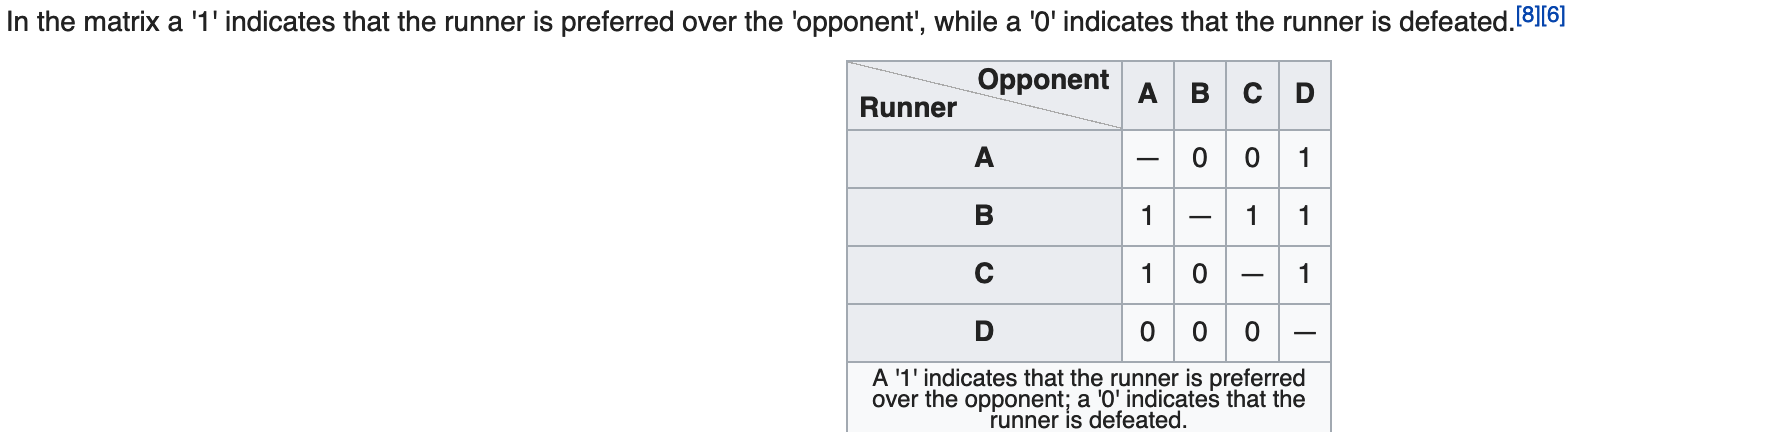

In [61]:
Image("Condorcet_wiki_table.png")

**As in the matrix above, in the symbolized matrix, `++` means runner won against opponent, `--` indicates runner is defeated**

In [62]:
Condorcet_winner(df1, candidates)

Creating the ballot dictionary...
Creating the candidate matrix to store pairwise results...

candidate_names:  ['Joseph M. Maestas', 'Kate I. Noble', 'Alan Webber', 'Peter N. Ives', 'Ronald S. Trujillo']

Updating the candidate matrix with pairwise results...




,Joseph M. Maestas,Kate I. Noble,Alan Webber,Peter N. Ives,Ronald S. Trujillo
Joseph M. Maestas,0,5010,4366,6987,7618
Kate I. Noble,7776,0,5618,8381,8334
Alan Webber,8420,7168,0,9303,8695
Peter N. Ives,5799,4405,3483,0,7244
Ronald S. Trujillo,5168,4452,4091,5542,0



Symbolizing the candidate matrix with pairwise results...



,Joseph M. Maestas,Kate I. Noble,Alan Webber,Peter N. Ives,Ronald S. Trujillo
Joseph M. Maestas,`,--,--,++,++
Kate I. Noble,++,`,--,++,++
Alan Webber,++,++,`,++,++
Peter N. Ives,--,--,--,`,++
Ronald S. Trujillo,--,--,--,--,`




Condorcet results: 
Rank 1. Alan Webber: [Rank, (Wins, losses] [1, (4, 0)]
Rank 2. Kate I. Noble: [Rank, (Wins, losses] [2, (3, 1)]
Rank 3. Joseph M. Maestas: [Rank, (Wins, losses] [3, (2, 2)]
Rank 4. Peter N. Ives: [Rank, (Wins, losses] [4, (1, 3)]
Rank 5. Ronald S. Trujillo: [Rank, (Wins, losses] [5, (0, 4)]


### 5. To debug Condorcet step by step

In [43]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))



In [44]:
all_ballots = list(df1['ballot_objects'].values)
print("Creating the ballot dictionary...")

ballot_dict=create_ballot_dict(df1)
print("Creating the candidate matrix to store pairwise results...")

candidate_names=[]
for cand in candidates:
    candidate_names.append(cand.name)
    
print("\ncandidate_names: ",candidate_names)
cand_matrix= pd.DataFrame(0, columns=candidate_names, index=candidate_names)
cand_matrix

Creating the ballot dictionary...
Creating the candidate matrix to store pairwise results...

candidate_names:  ['Joseph M. Maestas', 'Kate I. Noble', 'Alan Webber', 'Peter N. Ives', 'Ronald S. Trujillo']


,Joseph M. Maestas,Kate I. Noble,Alan Webber,Peter N. Ives,Ronald S. Trujillo
Joseph M. Maestas,0,0,0,0,0
Kate I. Noble,0,0,0,0,0
Alan Webber,0,0,0,0,0
Peter N. Ives,0,0,0,0,0
Ronald S. Trujillo,0,0,0,0,0


In [45]:
print("\nUpdating the candidate matrix with pairwise results...")
#for votes, ballot in take(2,ballot_dict.values()):
for votes, ballot in ballot_dict.values():
    ranked_candidates = [cand.name for cand in list(ballot.ranked_candidates)]
    process_cands=list(cand_matrix.columns)
    for i, current_cand in enumerate(ranked_candidates):
        process_cands.remove(current_cand)
        cand_matrix.loc[current_cand][process_cands]=cand_matrix.loc[current_cand][process_cands]+votes
print("\n")
cand_matrix




Updating the candidate matrix with pairwise results...




,Joseph M. Maestas,Kate I. Noble,Alan Webber,Peter N. Ives,Ronald S. Trujillo
Joseph M. Maestas,0,5010,4366,6987,7618
Kate I. Noble,7776,0,5618,8381,8334
Alan Webber,8420,7168,0,9303,8695
Peter N. Ives,5799,4405,3483,0,7244
Ronald S. Trujillo,5168,4452,4091,5542,0


#### In case you want to see the difference in pairwise counts

In [46]:
cand_matrix1 = cand_matrix.copy(deep=True)
for i in cand_matrix1.columns:
    for j in cand_matrix1.index:
        cand_matrix1[i][j] = cand_matrix[i][j] - cand_matrix[j][i]
cand_matrix1

,Joseph M. Maestas,Kate I. Noble,Alan Webber,Peter N. Ives,Ronald S. Trujillo
Joseph M. Maestas,0,-2766,-4054,1188,2450
Kate I. Noble,2766,0,-1550,3976,3882
Alan Webber,4054,1550,0,5820,4604
Peter N. Ives,-1188,-3976,-5820,0,1702
Ronald S. Trujillo,-2450,-3882,-4604,-1702,0


### Simplify the matrix


In [47]:
for i in cand_matrix.index:
    for j in cand_matrix.columns:
        if i ==j:
            cand_matrix.loc[i,j] ='`'
        else:
            if cand_matrix.loc[i,j]!= '++' and cand_matrix.loc[i,j]!= '--':
                #print(i,j)
                #print("cand_matrix.loc[i,j]: ", cand_matrix.loc[i,j])
                #print("cand_matrix.loc[j,i]: ", cand_matrix.loc[j,i])
                if cand_matrix.loc[i,j]>cand_matrix.loc[j,i]:
                    #print('true')
                    cand_matrix.loc[i,j] = '++'
                    cand_matrix.loc[j,i] = '--'
                else:
                    #print('false')
                    cand_matrix.loc[i,j] = '--'
                    cand_matrix.loc[j,i] = '++'
display(cand_matrix)
#.loc(index, col)



,Joseph M. Maestas,Kate I. Noble,Alan Webber,Peter N. Ives,Ronald S. Trujillo
Joseph M. Maestas,`,--,--,++,++
Kate I. Noble,++,`,--,++,++
Alan Webber,++,++,`,++,++
Peter N. Ives,--,--,--,`,++
Ronald S. Trujillo,--,--,--,--,`


In [48]:

result_dict={}
for i in cand_matrix.index:
    #print(list(cand_matrix.loc[i]))
    #print('Rank',countX(list(cand_matrix.loc[i]),'--')+1,':', i)
    key = ''.join([str(countX(list(cand_matrix.loc[i]),'--')+1), ". ",i])
    #print(key)
    result_dict[key]= [countX(list(cand_matrix.loc[i]),'--')+1, (countX(list(cand_matrix.loc[i]),'++'), countX(list(cand_matrix.loc[i]),'--'))]
for key, item in sorted(result_dict.items(), key=lambda x: x[1]):
    print("Rank %s: [Rank, (Wins, losses] %s" % (key, item))


Rank 1. Alan Webber: [Rank, (Wins, losses] [1, (4, 0)]
Rank 2. Kate I. Noble: [Rank, (Wins, losses] [2, (3, 1)]
Rank 3. Joseph M. Maestas: [Rank, (Wins, losses] [3, (2, 2)]
Rank 4. Peter N. Ives: [Rank, (Wins, losses] [4, (1, 3)]
Rank 5. Ronald S. Trujillo: [Rank, (Wins, losses] [5, (0, 4)]


### 6. Extras:

## To check on http://condorcet.ericgorr.net/condorcetCompute.php, input the following cell's results

In [49]:
#for item in take(2,ballot_dict.values()):
for item in ballot_dict.values():
    #print(item)
    res_str = str(item[0]) + ":"
    #print(item[0],":",)
    #if len(item[1].ranked_candidates)>1:
    for cand in item[1].ranked_candidates:
        res_str = res_str + cand.name + '>' 
    #print("*", res_str, "*", sep='')
    res_str=res_str[:-1]
    print(res_str)
    

264:Kate I. Noble>Joseph M. Maestas>Alan Webber>Peter N. Ives>Ronald S. Trujillo
72:Kate I. Noble>Peter N. Ives>Alan Webber>Ronald S. Trujillo>Joseph M. Maestas
823:Alan Webber>Kate I. Noble>Peter N. Ives>Joseph M. Maestas>Ronald S. Trujillo
266:Alan Webber>Peter N. Ives>Joseph M. Maestas>Kate I. Noble>Ronald S. Trujillo
406:Alan Webber>Joseph M. Maestas>Kate I. Noble>Peter N. Ives>Ronald S. Trujillo
104:Ronald S. Trujillo>Peter N. Ives>Joseph M. Maestas>Alan Webber>Kate I. Noble
58:Alan Webber>Ronald S. Trujillo>Peter N. Ives>Kate I. Noble>Joseph M. Maestas
42:Joseph M. Maestas>Ronald S. Trujillo>Kate I. Noble>Peter N. Ives>Alan Webber
438:Kate I. Noble>Alan Webber>Joseph M. Maestas>Peter N. Ives>Ronald S. Trujillo
118:Ronald S. Trujillo>Peter N. Ives>Joseph M. Maestas>Kate I. Noble>Alan Webber
186:Ronald S. Trujillo>Joseph M. Maestas>Peter N. Ives>Alan Webber>Kate I. Noble
40:Joseph M. Maestas>Alan Webber>Ronald S. Trujillo>Peter N. Ives>Kate I. Noble
678:Alan Webber>Kate I. Noble>Jo

#### In case you want to remove a candidate from all ballots(all_ballots) and write results to file

In [50]:
f=open('vote_rm_Andy.txt','w')
f.write('* ')
f.write(' '.join(['"'+cand.replace(' ', '')+'"' for cand in candidate_names if cand!="Andy Montroll"]))
f.write('\n')
for ele in all_ballots:
    #print(ele.ranked_candidates)
    cands = ['"'+cand.name.replace(' ', '')+'"' for cand in ele.ranked_candidates if cand.name!="Andy Montroll"]
    print('*',cands,'*', sep ='')
    if len(cands) == 0:
        continue
    f.write(' '.join(cands))
    f.write('\n')
f.close()

*['"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"JosephM.Maesta

*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maesta

*['"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"RonaldS.Trujill

*['"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"',

*['"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"AlanWebber"']*
*['"KateI.Noble"', '"RonaldS.Trujillo"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"AlanWebber"', '

*['"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"KateI.Noble"', 

*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', 

*['"PeterN.Ives"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', 

*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"Ron

*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"', '"AlanWebber"']*
*['"KateI.Noble"', '"AlanWebber"', '"Jos

*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"Kat

*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"', '"KateI.Noble"']*
*['"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"Jos

*['"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"Kat

*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"PeterN.Ives"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"']*
*['"KateI.Noble"', '"AlanWebber"', '"Pet

*['"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"Ron

*['"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"']*
*['"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"Pet

*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"KateI.Noble"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"', '"KateI.Noble"']*
*['"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"KateI.Noble"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"Pet

*['"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"AlanWebber"', '"JosephM.Maestas"']*
*['"PeterN.Ives"', '"RonaldS.Trujillo"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"']*
*['"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"Ro

*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"',

*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"',

*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"Kat

*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"Pet

*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"', '"KateI.Noble"']*
*['"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"Pet

*['"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"KateI.Noble"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"', '"KateI.Noble"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"RonaldS.Trujillo"', '"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"PeterN.Ives"']*
*['"AlanWebber"', '"KateI.Noble"', '"Pet

*['"KateI.Noble"', '"AlanWebber"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"PeterN.Ives"']*
*['"KateI.Noble"', '"RonaldS.Trujillo"', '"JosephM.Maestas"', '"AlanWebber"', '"PeterN.Ives"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"AlanWebber"']*
*['"JosephM.Maestas"', '"PeterN.Ives"', '"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"AlanWebber"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"JosephM.Maestas"', '"KateI.Noble"', '"AlanWebber"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"KateI.Noble"', '"PeterN.Ives"', '"AlanWebber"', '"RonaldS.Trujillo"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"JosephM.Maestas"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"Jos

*['"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"', '"AlanWebber"']*
*['"KateI.Noble"', '"AlanWebber"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"PeterN.Ives"', '"RonaldS.Trujillo"']*
*['"PeterN.Ives"', '"AlanWebber"', '"JosephM.Maestas"', '"KateI.Noble"', '"RonaldS.Trujillo"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"KateI.Noble"', '"PeterN.Ives"', '"JosephM.Maestas"', '"RonaldS.Trujillo"']*
*['"RonaldS.Trujillo"', '"AlanWebber"', '"PeterN.Ives"', '"JosephM.Maestas"', '"KateI.Noble"']*
*['"AlanWebber"', '"KateI.Noble"', '"RonaldS.Trujillo"', '"PeterN.Ives"', '"JosephM.Maestas"']*
*['"AlanWebber"', '"JosephM.Maestas"', '

#### Function to do the same as above

In [51]:
def rm_cand_from_all_ballots(all_ballots, cand_name):
    file_name = 'vote_rm_'+cand_name+'.txt'
    f=open(file_name,'w')
    f.write('* ')
    f.write(' '.join(['"'+cand.replace(' ', '')+'"' for cand in candidate_names if cand!=cand_name]))
    f.write('\n')
    for ele in all_ballots:
    #print(ele.ranked_candidates)
        cands = ['"'+cand.name.replace(' ', '')+'"' for cand in ele.ranked_candidates if cand.name!=cand_name]
        #print('*',cands,'*', sep ='')
        if len(cands) == 0:
            continue
        f.write(' '.join(cands))
        f.write('\n')
    print("Wrote results to file: ", file_name)
    print("First line in file will be all candidates that contested the election preceded with a star(*)")
    f.close()

In [53]:
rm_cand_from_all_ballots(all_ballots, "Alan Webber")

Wrote results to file:  vote_rm_Alan Webber.txt
First line in file will be all candidates that contested the election preceded with a star(*)


In [ ]:
#vote_rm_Dan.txt
#vote_rm_James.txt
#vote_rm_Andy.txt
#vote_rm_Kurt.txt